In [1]:
import sys

import random
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import networkx as nx

import shapely as sh
from shapely import geometry

import utilities.get_random_city as grc

import utilities.get_graph as gg
import utilities.forge_graph as fg
import utilities.visualise_graph as vg

random.seed(0)

%load_ext autoreload
%autoreload 2

INFO: 2019-03-05 11:37:23,970: get_random_city.py: 42:
	881 segments
	157 one-way
	362 two-way



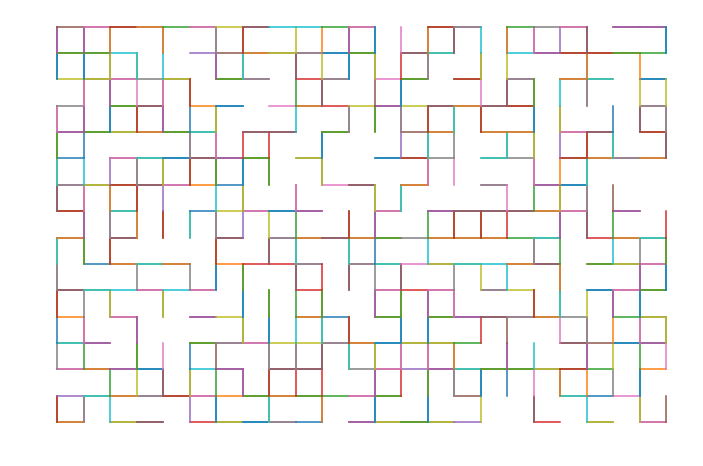

In [2]:
random_city = grc.get_random_city(
    city_size=[24, 16],
    frequencies=[0.3, 0.1, 0.1, 0.5]
    )
grc.plot_area(random_city)

INFO: 2019-03-05 11:37:38,871: visualise_graph.py: 83:
	18 dead ends
	50 disconnected nodes


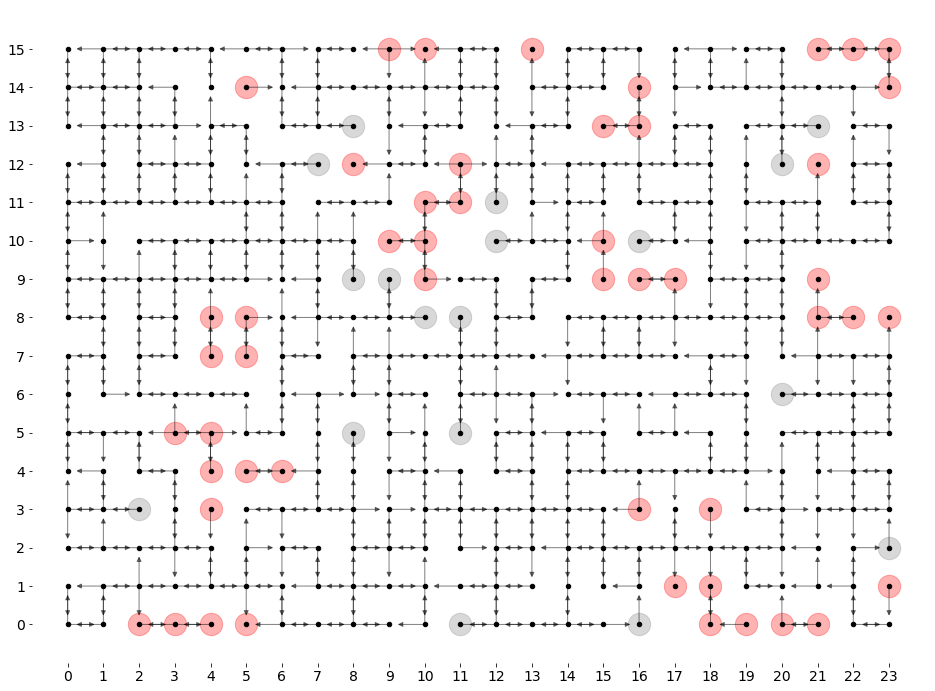

In [3]:
cg = gg.get_city_graph(random_city)
vg.visualise_city_graph(cg)

INFO: 2019-03-05 11:37:46,639: visualise_graph.py: 174:
	strongly connected: True
	disconnected nodes: 0
	straight drives: 1263
	right turns: 461
	left turns: 474
	u-turns: 682
	dead ends: 52


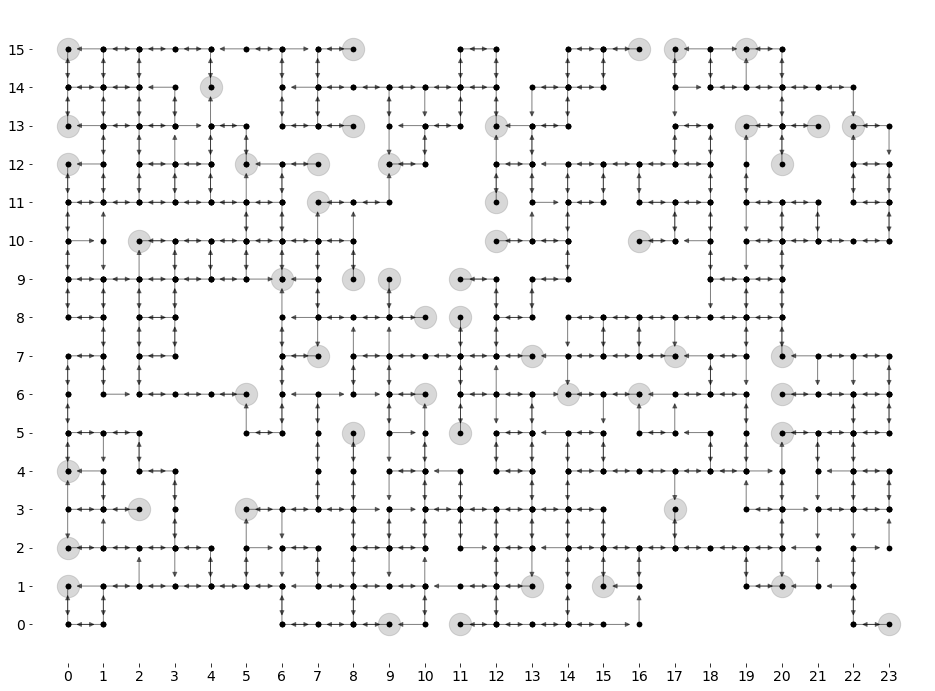

In [4]:
mg = gg.get_manoeuvre_graph(random_city)
vg.visualise_manoeuvre_graph(mg)

In [ ]:
# mg.edges()

In [ ]:
# city_edges = list(district_g.edges())
# for e in city_edges:
#     tail_n = e[0]
#     head_n = e[0]
#     if ((check_node_within_district(
#         district_borders, nodes_coordinates[tail_n]) is False)
#        or (check_node_within_district(
#         district_borders, nodes_coordinates[head_n]) is False))
#         district_g.remove_node(tail_n)
#         district_g.remove_node(head_n)

INFO: 2019-03-05 11:38:03,829: get_graph.py: 190:
district borders:
west-east: 0 - 12
south-north: 0 - 8
INFO: 2019-03-05 11:38:03,842: visualise_graph.py: 174:
	strongly connected: False
	disconnected nodes: 117
	straight drives: 375
	right turns: 133
	left turns: 142
	u-turns: 210
	dead ends: 14


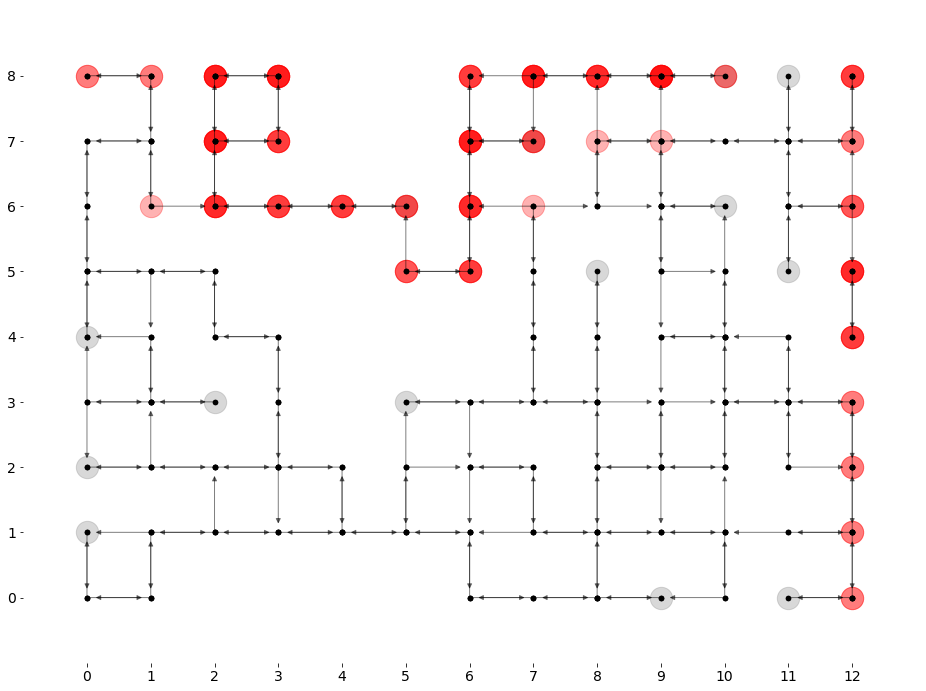

In [5]:
dg = gg.get_random_district_graph(mg)
vg.visualise_manoeuvre_graph(dg)

In [10]:
dg = fg.add_connecting_grafts(dg, mg)

INFO: 2019-03-05 11:39:45,635: forge_graph.py: 71:
nodes to add: ['45_t', '45_h', '45_t', '-46_h']
edges to add: [('45_t', '45_h'), ('-46_h', '45_t'), ('-46_h', '45_t')]
INFO: 2019-03-05 11:39:45,636: forge_graph.py: 71:
nodes to add: ['45_t', '45_h', '45_t', '-46_h']
edges to add: [('45_t', '45_h'), ('-46_h', '45_t'), ('-46_h', '45_t')]
INFO: 2019-03-05 11:39:45,637: forge_graph.py: 71:
nodes to add: ['82_t', '82_h', '-51_t', '-51_h', '-50_t', '-50_h', '82_t', '82_t', '82_t', '80_h', '-81_h', '-82_h']
edges to add: [('82_t', '82_h'), ('82_h', '-51_t'), ('-51_t', '-51_h'), ('-51_h', '-50_t'), ('-50_t', '-50_h'), ('80_h', '82_t'), ('-81_h', '82_t'), ('-82_h', '82_t'), ('80_h', '82_t'), ('-81_h', '82_t'), ('-82_h', '82_t')]
INFO: 2019-03-05 11:39:45,638: forge_graph.py: 71:
nodes to add: ['82_t', '82_h', '-51_t', '-51_h', '-50_t', '-50_h', '82_t', '82_t', '82_t', '80_h', '-81_h', '-82_h']
edges to add: [('82_t', '82_h'), ('82_h', '-51_t'), ('-51_t', '-51_h'), ('-51_h', '-50_t'), ('-50_t'

INFO: 2019-03-05 11:39:46,963: visualise_graph.py: 174:
	strongly connected: True
	disconnected nodes: 0
	straight drives: 354
	right turns: 112
	left turns: 124
	u-turns: 192
	dead ends: 17


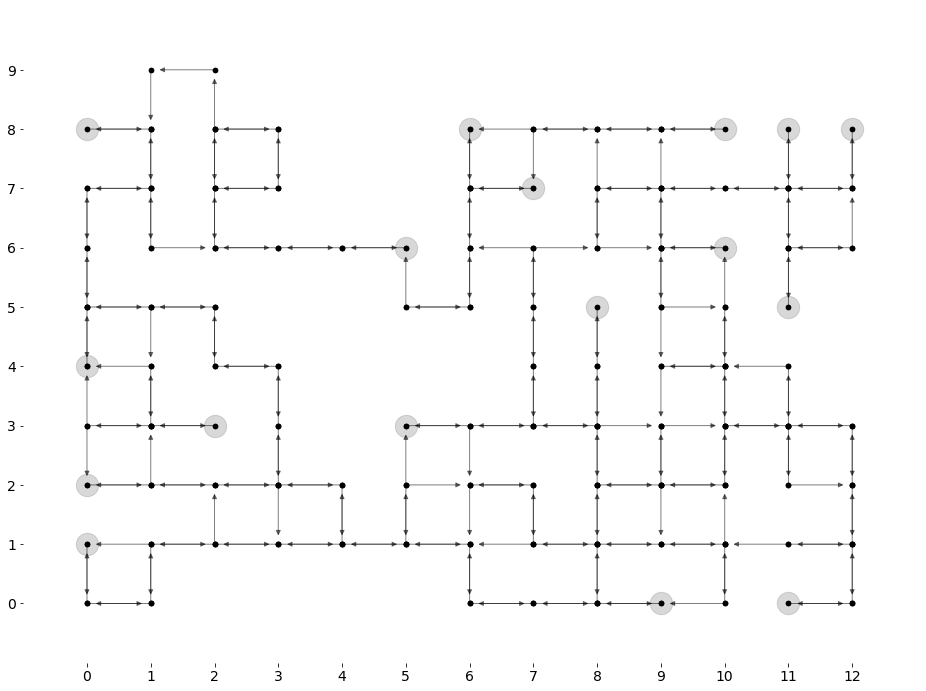

In [11]:
vg.visualise_manoeuvre_graph(dg)

In [ ]:
# connected_nodes = sorted(
#     nx.strongly_connected_components(foo),
#     key=len,
#     reverse=True)[0]
# disconnected_nodes = []
# for n in foo.nodes():
#     if n not in connected_nodes:
#         disconnected_nodes.append(n)
# print(len(disconnected_nodes), disconnected_nodes)
# nodes_coordinates = nx.get_node_attributes(foo, 'coordinates')
# for n in disconnected_nodes:
#     print(n, nodes_coordinates[n])

In [ ]:
# bar = foo.copy()
# bar.remove_nodes_from(disconnected_nodes)

In [ ]:
# nx.is_strongly_connected(bar)

In [ ]:
# vg.visualise_manoeuvre_graph(bar)

In [ ]:
# for n in disconnected_nodes:
#     print(f"{n}: out {foo.out_edges(n)} in {foo.in_edges(n)}")

In [ ]:
# nodes_coordinates = nx.get_node_attributes(mg, 'coordinates')
# for n in disconnected_nodes:
#     print(f"{n}: {nodes_coordinates[n]}")

In [ ]:
# foo.remove_nodes_from(disconnected_nodes)

In [ ]:
# vg.visualise_manoeuvre_graph(foo)

In [ ]:
scc_list = sorted(
        list(nx.strongly_connected_components(foo)),
        key=len,
        reverse=True)
for scc in scc_list:
    if len(scc) == 1:
        n = list(scc)[0]
#         for n in [e[0] for e in dg.in_edges(n)]:
#             print(n in dg.nodes())
        for n in [e[0] for e in dg.out_edges(n)]:
            print(n in dg.nodes())

In [ ]:
# nodes_coordinates = nx.get_node_attributes(district_g, 'coordinates')
# disconnected_nodes = [nodes_coordinates[n]
#                       for n in list(district_g.nodes())
#                       if n not in connected_nodes]

In [ ]:
nx.shortest_path(working_g, 0, 1)[1:-1]

In [ ]:
nx.shortest_path(working_g, 1, 0)[1:-1]

In [ ]:
# nx.condensation(city_manoeuvre_g, district_manoeuvre_subg)

In [ ]:
a = sorted([d for n, d in manoeuvre_graph.degree()], reverse=True)
plt.hist(a)

In [12]:
ig = gg.get_inverted_graph(random_city)

INFO: 2019-03-05 12:00:25,786: visualise_graph.py: 85:
	15 dead ends
	60 disconnected nodes


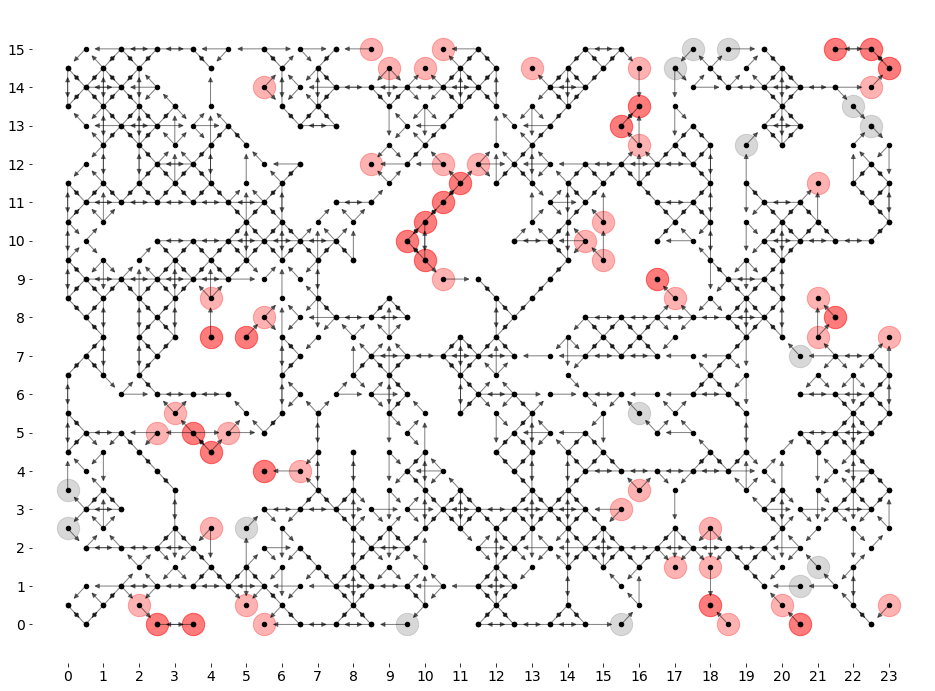

In [28]:
vg.visualise_city_graph(ig)

In [19]:
# for n in ig.nodes():
#     print(ig.out_edges(n))

In [20]:
nx.is_strongly_connected(ig)

False

In [ ]:
def prune_u_turns(
        g: nx.DiGraph):
    edges = list(g.edges())
    for e in edges:
        manoeuvre = g.get_edge_data(*e)['manoeuvre']
        if manoeuvre == 'make_u_turn':
            test_g = g.copy()
            test_g.remove_edge(*e)
            if nx.is_strongly_connected(test_g):
                inverted_graph.remove_edge(*e)
                
def prune_left_turns(
        g: nx.DiGraph):
    edges = list(g.edges())
    for e in edges:
        manoeuvre = g.get_edge_data(*e)['manoeuvre']
        if manoeuvre == 'turn_left':
            test_g = g.copy()
            test_g.remove_edge(*e)
            if nx.is_strongly_connected(test_g):
                inverted_graph.remove_edge(*e)

In [ ]:
prune_u_turns(inverted_graph)
prune_left_turns(inverted_graph)

In [ ]:
vis_g.visualise_graph(inverted_graph)

In [ ]:
import geopandas as gpd

In [26]:
np.arange(0.5, 17.6 + 1.0, 1)

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5])